# Adiabatic Flame for  1D flow of n-decane model from RMG using ctwrap
This model from RMG is the detailed model of n-decane and we calculate the flame speed for a 1D reactor using the (ctwrap.modules.adiabatic_flame) from cantera and ctwrap

## 1. Function/Class Definitions

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [2]:
import sys
sys.path.append('/Users/ebubeajulu/anaconda3/envs/rmg_py3/')

In [3]:
!which python

/Users/ebubeajulu/anaconda3/envs/rmg_py3/bin/python


In [4]:
import cantera as ct
import ctwrap as cw

## 2. Simulations

### 2.1 Create Simulation Object

In [5]:
sim = cw.Simulation.from_module(cw.modules.adiabatic_flame)
sim

In [6]:
%%time 
sim.run()

    defaults: mixture-averaged flamespeed = 0.711265 m/s
    defaults: multi-component flamespeed  = 0.727009 m/s
CPU times: user 444 ms, sys: 22.1 ms, total: 466 ms
Wall time: 464 ms


### 2.2 Create Simulation Handler

In [10]:
s = cw.SimulationHandler.from_yaml('adiabatic_flame_nc10.yaml', verbosity=1)
s

Simulations for entry `upstream.phi` with values: [0.5, 0.75, 0.96, 1.0, 1.17, 1.38, 1.59, 1.8, 2.0]


### 2.3 Run Simulation Tasks in Parallel

In [18]:
%%time
s.run_parallel(sim, verbosity=2)

 * running simulation using 4 cores
   - starting Process-14
   - starting Process-15
   - starting Process-13
   - starting Process-16
   - terminating Process-13
 * processing `upstream.phi_0.75` (Process-15)
 * processing `upstream.phi_0.5` (Process-14)
 * processing `upstream.phi_0.96` (Process-16)


**** WARNING ****
For species HOCHO(370), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


**** WARNING ****
For species HOCHO(370), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


**** WARNING ****
For species HOCHO(370), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678
CPU times: user 29.8 ms, sys: 36.2 ms, total: 66 ms
Wall time: 20m

True

## 3. Create Graphical Output

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### 3.1 Load Data
Loading data from output file

In [20]:
data = cw.fileio.from_hdf(s.output_name)
data

{'defaults': {'chemistry': {'mechanism': 'reduced_283.cti'},
  'domain': {'width': [30, 'millimeter', 'domain width']},
  'upstream': {'P': [1.0, 'atmosphere', 'pressure'],
   'T': [300.0, 'kelvin', 'temperature'],
   'fuel': 'nC10H22(1)',
   'oxidizer': 'O2(2):0.21,N2:0.79',
   'phi': [0.55, 'dimensionless', 'equivalence ratio']}},
 'variation': {'entry': 'upstream.phi',
  'tasks': ['upstream.phi_0.5',
   'upstream.phi_0.75',
   'upstream.phi_0.96',
   'upstream.phi_1.0',
   'upstream.phi_1.17',
   'upstream.phi_1.38',
   'upstream.phi_1.59',
   'upstream.phi_1.8',
   'upstream.phi_2.0'],
  'values': [0.5, 0.75, 0.96, 1.0, 1.17, 1.38, 1.59, 1.8, 2.0]}}

In [21]:
mix = {k.split('<')[0]: data[k] for k in data if 'mix' in k}
mlt = {k.split('<')[0]: data[k] for k in data if 'multi' in k}

tasks = data.get('variation')['tasks']
phi = data.get('variation')['values']

In [22]:
up = data.get('defaults')['upstream']

### 3.2 Plot
plot flame speeds

KeyError: 'upstream.phi_0.5'

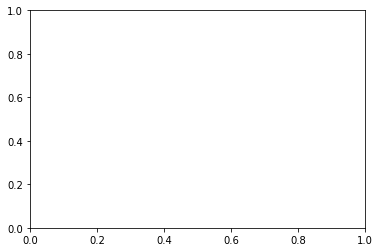

In [23]:
# create figure
fig, ax = plt.subplots(1)

# plot results

u_mix = [ mix[t]['u (m/s)'][0] for t in tasks]
u_mlt = [ mlt[t]['u (m/s)'][0] for t in tasks]

ax.plot(phi, u_mix, marker='o',linestyle='none', label='mixture-averaged')

ax.plot(phi, u_mlt, marker='s',markerfacecolor='none', linestyle='none', label='multi-component')


# add title/axis labels

ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Adiabatic premixed flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))


# add legend

leg = ax.legend(loc='lower right', title='Transport Model')

_ = leg.draw_frame(False)